In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=pd.DataFrame({'Mileage':[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4],
                  'Premium':[392.5,46.2,15.7,422.2,119.4,170.9,56.9,77.5,214,65.3,250,220,217.5,140.88,97.25]})
data

,Mileage,Premium
0,15.0,392.50
1,14.0,46.20
2,17.0,15.70
3,7.0,422.20
4,10.0,119.40
5,7.0,170.90
6,20.0,56.90
7,21.0,77.50
8,18.0,214.00
9,11.0,65.30


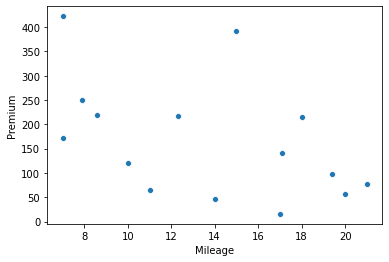

In [3]:
sns.scatterplot(data['Mileage'],data['Premium'])

In [4]:
data.corr()

,Mileage,Premium
Mileage,1.000000,-0.475073
Premium,-0.475073,1.000000


In [5]:
x = data['Mileage']
y = data['Premium']

In [6]:
#ypred b1x + b0
b0 = 250
b1 = -1

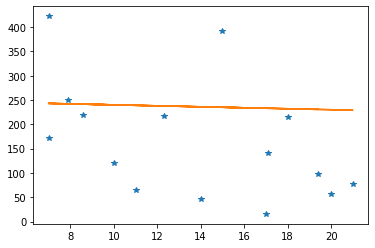

In [7]:
plt.plot(x,y,'*')
plt.plot(x,b1*x+b0)

In [8]:
b1 = (np.sum((x - x.mean()) * (y - y.mean())))/np.sum((x - x.mean())**2)
b0 = y.mean() - b1*x.mean()

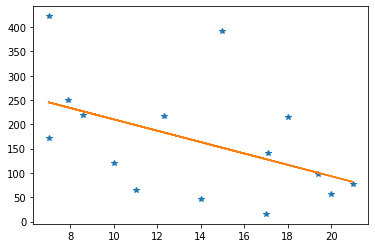

In [9]:
plt.plot(x,y,'*')
plt.plot(x,b1*x+b0)

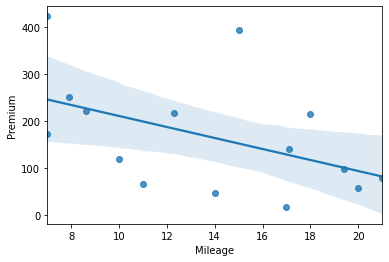

In [41]:
sns.regplot(x,y,data=data)

In [11]:
ypred = b1*x + b0
residue = y - ypred
residue

0     240.771528
1    -117.218976
2    -112.647466
3     176.947502
4     -90.780989
5     -74.352498
6     -36.375956
7      -4.085453
8      97.343037
9    -133.190485
10     15.268955
11     -6.547693
12     34.207169
13     13.701584
14     -3.040258
dtype: float64

In [12]:
np.sum(residue)

-1.4210854715202004e-13

In [13]:
sse = np.sum(residue**2)
sse

159678.96224549576

In [14]:
mse = sse/len(x)
mse

10645.264149699717

In [15]:
rmse = np.sqrt(mse)
rmse

103.17588938167539

In [16]:
# SST = Sum of Square Total = sum of ((y - ymean)**2) --- Total Variance

# SSR = Sum of Square Regression = sum of ((ypredicted - ymean)**2) --- Explained Variance

# SSE = Sum of Square Error =  Sum of ((yactual - ypredicted)**2) --- Unexplained Variance

In [17]:
sst = np.sum((y - y.mean())**2)
sst

206222.20604

In [18]:
ssr = np.sum((ypred - y.mean())**2)
ssr

46543.24379450419

In [19]:
ssr + sse

206222.20603999996

In [20]:
# SST = SSR + SSE

In [21]:
ssr / sst  # R-Square

0.22569462662753403

In [22]:
import statsmodels.api as sm

In [23]:
xc = sm.add_constant(x)  # We need to add a constant
xc.head()

,const,Mileage
0,1.0,15.0
1,1.0,14.0
2,1.0,17.0
3,1.0,7.0
4,1.0,10.0


In [24]:
ols = sm.OLS(y,xc)
ols_mod = ols.fit()

In [25]:
ols_mod.summary()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Sat, 03 Oct 2020   Prob (F-statistic):             0.0735
Time:                        01:55:29   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     87.035      3.758      0.002     139.057     515.115
Mileage      -11.6905      6.006     -1.947      0.074     -24.665       1.284
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.770
Skew:                           0.841   Prob(JB):                        0.413
Kurtosis:                       3.057   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
k = 1 # k is no of feature
# df = n - k -1
dfe = 15 -1 -1
Mse = sse/dfe

In [27]:
dfr = 1  # Df of model
Msr = ssr/dfr

In [28]:
Msr/Mse

3.7892416184313102

In [29]:
# if prob(F-statistic) is > 0.05 that means we fail to reject null hypothesis that means the feature has no effect to this model
# if prob(F-statistic) is < 0.05 then we should consider the model.

In [30]:
# if AIC and BIC has less values then we will pick the model.

In [31]:
# b1 = -11.69
# one unit increase in mileage will decrease the premium by 11.69 units
# provided all oter features are remain constant

In [32]:
# y = b1x1 + b2x2 + b0
# if x1 and x2 are correlated
# Is it possible to increase x1 alone by keeping x2 constant?

In [33]:
Rmse = np.sqrt(Mse)
std_err = Rmse / np.sqrt(np.sum((x-x.mean())**2))
std_err

6.005609036323512

In [34]:
t1 = b1/std_err
t1

-1.9465974464257652

In [35]:
t_table_value = stats.t.ppf(0.025,len(x)-2)
t_table_value

-2.160368656461013

In [36]:
#H0(For T-Test) : The coefficient of the corresponding feature is zero

In [37]:
# F-Stat talks about the whole model
# T-Stat talks about individual feature

In [38]:
ci1 = b1 + t_table_value*std_err
ci2 = b1 - t_table_value*std_err
ci1,ci2

(-24.664832739371192, 1.283826310693497)